In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

  
# data (as pandas dataframes) 
X = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
y =pd.DataFrame(X['quality'],columns=['quality'])
X=X.drop(['quality'],axis=1)
# metadata 



/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [3]:
print(X.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  


In [4]:
X.corrwith(y['quality'])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
dtype: float64

There are some features that are npt related to quality of the wine->
* ph
* sugar
* free sulphur dioxide

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

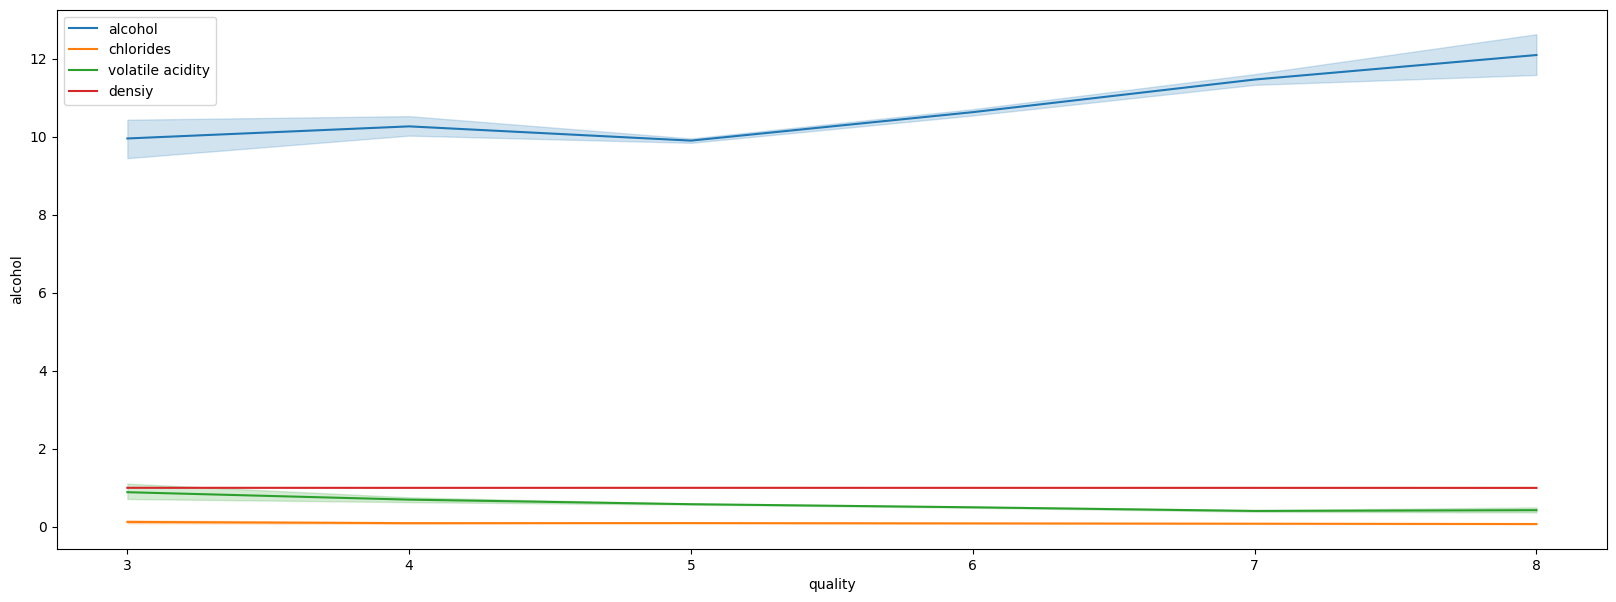

In [5]:
plt.figure(figsize=(20,7))
sns.lineplot(x=y['quality'],y=X['alcohol'],label='alcohol')
sns.lineplot(x=y['quality'],y=X['chlorides'],label='chlorides')
sns.lineplot(x=y['quality'],y=X['volatile acidity'],label='volatile acidity')
sns.lineplot(x=y['quality'],y=X['density'],label='densiy')

plt.legend()
plt.show()

In [6]:
np.unique(y)
y.value_counts()

quality
5          681
6          638
7          199
4           53
8           18
3           10
Name: count, dtype: int64

In [7]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(X)
df_scaled=pd.DataFrame(scaled_data,columns=X.columns)           
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.199827,0.031282,0.033259,0.484008,0.423327,0.133923,0.211695,-0.001486,0.005859,0.211938,0.139364
std,0.829093,0.716239,0.590306,2.014183,2.353265,0.747154,0.822383,0.844445,0.812560,0.941705,0.666042
min,-1.571429,-1.600000,-0.787879,-1.857143,-3.350000,-0.928571,-0.800000,-2.988814,-3.000000,-1.611111,-1.125000
25%,-0.380952,-0.520000,-0.515152,-0.428571,-0.450000,-0.500000,-0.400000,-0.514541,-0.526316,-0.388889,-0.437500
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.619048,0.480000,0.484848,0.571429,0.550000,0.500000,0.600000,0.485459,0.473684,0.611111,0.562500
max,3.809524,4.240000,2.242424,19.000000,26.600000,4.142857,6.275000,3.105145,3.684211,7.666667,2.937500


In [9]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50
1,-0.047619,1.44,-0.787879,0.571429,0.95,0.785714,0.725,0.022371,-0.578947,0.333333,-0.25
2,-0.047619,0.96,-0.666667,0.142857,0.65,0.071429,0.400,0.111857,-0.263158,0.166667,-0.25
3,1.571429,-0.96,0.909091,-0.428571,-0.20,0.214286,0.550,0.559284,-0.789474,-0.222222,-0.25
4,-0.238095,0.72,-0.787879,-0.428571,-0.15,-0.214286,-0.100,0.469799,1.052632,-0.333333,-0.50


In [10]:
df_scaled.corrwith(y['quality'])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
dtype: float64

In [11]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE with a desired sampling strategy
smote = SMOTE(sampling_strategy="auto",k_neighbors=3)  # 0.5 means equalizing the class sizes
# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(df_scaled, y)


In [12]:
X_resampled.shape

(4086, 11)

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X_resampled,np.array(y_resampled).reshape(-1))

In [14]:
X_train.shape

(3064, 11)

In [15]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

In [16]:
mlp=MLPClassifier(early_stopping=True,hidden_layer_sizes=(64,32),max_iter=10000)



In [17]:
y_resampled.value_counts()

quality
3          681
4          681
5          681
6          681
7          681
8          681
Name: count, dtype: int64

In [18]:
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train))
y_pred=mlp.predict(X_test)
print(classification_report(y_test,y_pred))

0.8211488250652742
              precision    recall  f1-score   support

           3       0.96      1.00      0.98       154
           4       0.77      0.96      0.85       164
           5       0.69      0.62      0.65       178
           6       0.52      0.47      0.50       167
           7       0.80      0.67      0.73       181
           8       0.93      1.00      0.96       178

    accuracy                           0.78      1022
   macro avg       0.78      0.79      0.78      1022
weighted avg       0.78      0.78      0.78      1022



In [19]:
parameters = {
    'C' : [0.001, 0.1,1,10],
    'gamma' : [0.001, 0.1,1,10],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'gamma': 1}
accuracy :  0.879558663856422
